## Chapter 15

* RNN(Recurrent neural network) : 미래를 예측할 수 있는 순환 신경망. 임의 길이를 가진 시퀀스(시계열 데이터)를 다룰 수 있음.
  * 문장, 문서, 오디오 샘플을 입력으로 받을 수 있고, 자동 번역, 자연어 처리 등에 유용

### 순환 뉴런과 순환 층

* 순환 신경망은 활성화 신호가 입력 -> 출력 방향으로만 흐르지 않고, 뒤쪽으로 순환하는 연결도 존재.
* 각 time step(또는 frame) $t$마다, 순환 뉴런은 $\mathbf{x}_{(t)}$와 이전 time step의 출력인 $y_{(t-1)}$을 입력으로 받음
  * 첫 번째 time step은 이전 출력이 없으므로 이전 출력값을 0으로 설정함.
  * 이러한 형태의 내트워크를 시간을 축으로 하여 표현할 수 있고, 이를 시간에 따라 네트워크를 펼쳤다고 한다.
* 각 순환 뉴런은 입력과 이전 time step의 출력을 위한 가중치를 각각 가짐($\mathbf{w}_x$, $\mathbf{w}_y$)
* 순환 층 전체의 출력 벡터는 $\mathbf{y}_{(t)}=\phi \left(\mathbf{W}_x^T\mathbf{x}_{(t)}+\mathbf{W}_y^T\mathbf{y}_{(t-1)}+\mathbf{b}\right)$가 된다.($\phi$는 활성화 함수)

* time step에 걸쳐 어떤 상태를 보존하는 신경망의 구조를 **메모리 셀**이라고 함.
* 하나의 순환 뉴런이나 순환 뉴런의 층은 짧은 패턴만 학습할 수 있음.
  * 보통 RNN에서 셀은 FCN에서의 층을 의미
* time step $t$에서의 셀의 상태는 그 time step의 입력과 이전 time step의 상태에 대한 함수 $\mathbf{h}_{(t)}=f(\mathbf{h}_{(t-1)}, \mathbf{x}_{(t)})$이다.
* 간단한 셀의 경우, 출력이 각 셀의 입력으로 들어가지만, 복잡한 셀의 경우 출력 대신 셀의 상태 $\mathbf{h}$가 셀로 들어갈 수도 있음.

* RNN은 입력 시퀀스를 받아 출력 시퀀스를 만들 수 있고, 이를 Sequence-to-Sequence Network라고 함.
  * ex) 주식 가격 시계열 데이터를 주입하면, 네트워크는 각 입력값보다 하루 앞선 가격을 출력(즉, N일치의 주식 가격을 입력하면 N-1일 전부터 내일까지 가격을 출력)
* 또는, 입력 시퀀스를 받았을 때 마지막을 제외한 모든 출력을 무시할 수 있고, 이를 Sequence-to-Vector Network라고 함.
  * ex) 영화 리뷰에 있는 연속된 단어들을 넣었을 때 평가 점수를 출력
* 반대로, 벡터를 반복해서 네트워크에 넣고, 하나의 시퀀스를 출력할 수 있는데, 이를 Vector-to-Sequence Network라고 함.
  * ex) 이미지를 입력해 이미지에 대한 캡션 출력
* Encoder라고 부르는 Sequence-to-Vector 네트워크 뒤에, Decoder라고 부르는 Vector-to-Sequence Network를 연결할 수 있음. 이를 인코더-디코더라고 함.
  * ex) 한 언어의 문장을 다른 언어로 번역하는 데 사용. 한 문장을 네트워크에 넣으면 하나의 vector 표현으로 바꾸고, 디코더가 이를 다른 언어의 문장으로 디코딩.
  * 문장의 마지막 단어가 번역의 첫 번째 단어에 영향을 줄 수 있으므로 Sequence-to-Sequence로 한 단어씩 번역하는 것 보다 더 잘 작동함.

### RNN 훈련하기

* RNN을 time step으로 펼치고, 일반적인 역전파를 사용할 수 있음(**BPTT**(backpropagation through time))
  * 첫 번째 정방향 패스가 펼쳐진 네트워크를 통과한 뒤, 비용 함수 $C(\mathbf{Y}_{(0)}, \mathbf{Y}_{(1)}, \cdots , \mathbf{Y}_{(T)})$를 출력하여 출력 시퀀스가 평가됨. 이때, 일부 출력은 무시될 수 있음.
  * 이후, 비용 함수의 gradient는 네트워크를 따라 역방향으로 전파되고, 계산된 gradient를 사용하여 모델 파라미터를 업데이트.
  * 비용 함수의 gradient는 비용 함수 계산에 사용된 출력들로만 역방향으로 전파됨.

### 시계열 예측

* 시간당 접속 이용자 수, 도시의 날짜별 온도 등 time step마다 하나 이상의 값을 가진 시퀀스를 **시계열**(time series)이라고 함.
  * time step마다 하나의 값을 가지면 단변량 시계열, 여러 값을 가지면 다변량 시계열
  * 시계열에서 미래의 값을 예측하는 것을 forecast라고 하고, 과거 데이터로부터 누락된 값을 예측하는 것을 imputation(값 대체)이라고 함.

In [3]:
import numpy as np

def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))    # sin 곡선1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))   # sin 곡선2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)     # 잡음
    return series[..., np.newaxis].astype(np.float32)

> 지정한 batch_size만큼 n_steps길이의 여러 시계열 생성. 크기는 `[배치 크기, time step의 수, 1]`

In [4]:
n_steps = 50
series = generate_time_series(10000, n_steps+1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [17]:
import matplotlib.pyplot as plt

def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$", legend=True):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bo", label="Target")
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "rx", markersize=10, label="Prediction")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])
    if legend and (y or y_pred):
        plt.legend(fontsize=14, loc="upper left")

* train set은 7000개의 길이 50 시계열을 담고, validation set은 2000개, test set은 1000개의 데이터를 담음.
* 각 시계열마다 하나의 값을 예측해야 하므로 target은 열 벡터가 됨(즉, `y_train`은 `[7000, 1]` 크기)

* RNN을 평가하기 위해 기준 성능을 준비하는 것이 좋음. 가장 간단한 방법으로는 시계열의 마지막 값을 그대로 예측하는 순진한 예측(naive forecasting)을 사용할 수 있음.

In [5]:
import tensorflow as tf
from tensorflow import keras

y_pred = X_valid[:, -1]
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.021171745

* 또는 완전 연결 네트워크를 이용할 수 있음.
* 입력으로 1차원 vector가 필요하므로 `Flatten`층 사용

In [6]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 2s 2ms/step - loss: 0.1048 - val_loss: 0.0564
Epoch 2/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0399 - val_loss: 0.0281
Epoch 3/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0215 - val_loss: 0.0166
Epoch 4/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0138 - val_loss: 0.0120
Epoch 5/20
219/219 [==============================] - 0s 995us/step - loss: 0.0107 - val_loss: 0.0100
Epoch 6/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0091 - val_loss: 0.0088
Epoch 7/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0082 - val_loss: 0.0081
Epoch 8/20
219/219 [==============================] - 0s 917us/step - loss: 0.0074 - val_loss: 0.0073
Epoch 9/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0068 - val_loss: 0.0068
Epoch 10/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0063 - val_loss: 0.

In [7]:
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 0s 758us/step - loss: 0.0042


0.004186415113508701

* 다음으로, RNN을 사용하여 예측
* 아래의 코드는 하나의 뉴런으로 이루어진 하나의 층을 가짐.
* 순환 신경망은 어떤 길이의 time step도 처리할 수 있으므로 첫 번째 입력 차원은 `None`.
* `SimpleRNN`층은 활성화 함수로 tanh를 사용.
* 초기 상태 $h_{(init)}$을 0으로 설정하고, 첫 번째 time step $x_{0}$와 함께 하나의 순환 뉴런으로 전달. 뉴런은 갖우치 합을 계산하고, tanh를 적용하여 $y_0$를 출력하고, 기본 RNN에서는 이 출력이 새로운 상태 $h_0$가 됨. $h_0$는 다음 입력 값 $x_{(1)}$과 함꼐 동일한 순환 뉴런으로 전달. 이것이 마지막 time step까지 반복.
  * 보통 kears의 순환 층은 최종 출력만 반환하므로 time step마다 출력하려면 `return_sequence=True`로 지정해야 함.

In [9]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])    # 1은 unit 수. unit수가 20이라면 (8, 2000, 1)크기의 입력에 대한 출력은 (8, 2000, 20)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 3s 8ms/step - loss: 0.2260 - val_loss: 0.1527
Epoch 2/20
219/219 [==============================] - 1s 6ms/step - loss: 0.1042 - val_loss: 0.0768
Epoch 3/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0669 - val_loss: 0.0601
Epoch 4/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0553 - val_loss: 0.0512
Epoch 5/20
219/219 [==============================] - 1s 7ms/step - loss: 0.0473 - val_loss: 0.0444
Epoch 6/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0412 - val_loss: 0.0393
Epoch 7/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0365 - val_loss: 0.0351
Epoch 8/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0326 - val_loss: 0.0317
Epoch 9/20
219/219 [==============================] - 1s 7ms/step - loss: 0.0295 - val_loss: 0.0288
Epoch 10/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0269 - val_loss: 0.0265

In [10]:
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 0s 3ms/step - loss: 0.0144


0.014405753463506699

* 순진한 예측보다는 낫지만, 간단한 선형 모델보다는 나쁨.

> 가중 이동 평균, 자동 회귀 누적 이동 평균(ARIMA) 등 시계열을 예측하는 다양한 방법이 존재하고, 이 중 일부는 트렌드나 계절성을 제거해야 함. 예를 들어, 어떤 웹사이트에서 매달 10%씩 접속자 수가 증가한다면, 이러한 트렌드를 삭제하고 예측한 뒤, 최종 예측에 다시 트렌드를 더해야 함. 만약, 선크림 판매량을 예측한다면 선크림은 여름에 더 잘팔리므로 이러한 계절성을 삭제해야 함.  
> RNN에는 이러한 작업이 필요없음

* RNN은 셀을 여러 층으로 쌓는 것이 일반적(심층 RNN)
* keras에서는 단순히 순환 층을 여러 개 쌓는 것으로 구현가능.

In [12]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 6s 18ms/step - loss: 0.0555 - val_loss: 0.0072
Epoch 2/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0057 - val_loss: 0.0049
Epoch 3/20
219/219 [==============================] - 4s 16ms/step - loss: 0.0043 - val_loss: 0.0052
Epoch 4/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 5/20
219/219 [==============================] - 4s 16ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 6/20
219/219 [==============================] - 4s 16ms/step - loss: 0.0035 - val_loss: 0.0036
Epoch 7/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0034 - val_loss: 0.0032
Epoch 8/20
219/219 [==============================] - 4s 16ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 9/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0031 - val_loss: 0.0033
Epoch 10/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0032 - val_lo

In [13]:
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 0s 6ms/step - loss: 0.0030


0.0029614162631332874

* 선형 모델보다 성능이 높음
* 단, 마지막 층은 단변량 시계열을 예측하므로 하나의 유닛만 필요하고, 이는 은닉 상태 $\mathbf{h}$가 하나의 숫자라는 것을 의미함. 즉, 마지막 층의 은닉 상태는 크게 필요하지 않고, tanh를 사용하기 때문에 예측된 값이 -1과 1사이에 놓이므로 다른 활성화 함수를 사용해야 될 때 힘들 수 있음.
* 이로 인해, 주로 출력층은 Dense층으로 바꾸는 경우가 많음.
  * 성능이 비슷하면서 더 빠르게 수렴. 또한, 원하는 활성화 함수 사용 가능
```Python
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])
```

* 여러 time step 앞을 예측(ex. 다음 값 1개가 아닌 10개를 예측)하려면, 이미 훈련된 모델을 사용해 다음 값을 예측하고, 해당 값을 입력으로 추가하는 방법이 있음. 이후, 추가된 입력을 다시 모델에 넣음

In [18]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "bo-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "rx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)

In [19]:
series = generate_time_series(1, n_steps+10)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new
for step_ahead in range(10):
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)
    
Y_pred = X[:, n_steps:]

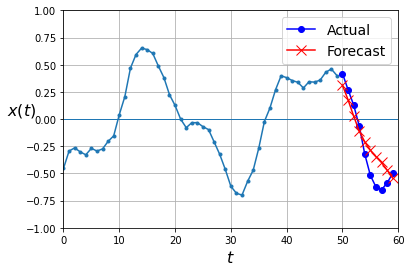

In [21]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

* 미래의 time step은 갈 수록 오차가 누적됨. 이 모델에 대해 MSE를 계산하면(코드 생략) 0.029로, 이전 모델보다 나쁨. 이는 단순한 방식보다 훨씬 좋지만, 선형 모델보다는 나쁨.
* 즉, 위의 방식보다 선형 모델을 사용하는 것이 성능 및 속도가 더 나음.

* 또 다른 방법으로는, RNN을 훈련해 다음 값 10개를 한 번에 예측할 수 있음.
* sequence-to-vector 모델을 사용하지만, 값을 10개를 출력하도록 바꿈.

In [27]:
n_steps = 50

series = generate_time_series(10000, n_steps + 10)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 5s 13ms/step - loss: 0.0555 - val_loss: 0.0283
Epoch 2/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0228 - val_loss: 0.0207
Epoch 3/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0173 - val_loss: 0.0160
Epoch 4/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0149 - val_loss: 0.0137
Epoch 5/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0134 - val_loss: 0.0121
Epoch 6/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0124 - val_loss: 0.0119
Epoch 7/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0117 - val_loss: 0.0105
Epoch 8/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0115 - val_loss: 0.0103
Epoch 9/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0108 - val_loss: 0.0099
Epoch 10/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0104 - val_lo

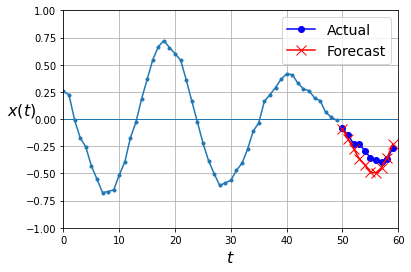

In [28]:
series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, -10:, :]
Y_pred = model.predict(X_new)[..., np.newaxis]

plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

* 위처럼 마지막 time step에서만 다음 10개의 값을 예측하는 것 대신, 모든 time step에서 다음 값 10개를 예측하도록 할 수 있음. 즉, sequence-to-sequence RNN으로 바꿀 수 있음.
  * 모든 time step에서 RNN 출력에 대한 항이 손실 함수에 포함되므로, 더 많은 오차 gradient가 모델로 흐름.
  * 훈련을 안정적으로 만들고 훈련 속도를 높임.
  * time step 0에서는 time step 1\~10 까지의 예측을 담은 vector를, time step 1에서는 time step 2\~11 까지의 예측을 담은 vector를 출력. 각 target은 입력 시퀀스와 동일한 길이의 시퀀스이고, time step마다 10차원 vector를 가짐.

In [41]:
series = generate_time_series(10000, n_steps + 10)
X_train = series[:7000, :n_steps]
X_valid = series[7000:9000, :n_steps]
X_test = series[9000:, :n_steps]
Y = np.empty((10000, n_steps, 10))

for step_ahead in range(1, 10+1):
    Y[:, :, step_ahead-1] = series[:, step_ahead:step_ahead + n_steps, 0]
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

* 모든 순환 층에 `return_sequences=True`를 지정해야 하고, 모든 time step에서의 출력을 `Dense`로 전달하기 위해 `TimeDistributed`층을 사용. 이는 다른 층을 감싸 입력 시퀀스의 모든 time step에 이를 적용함.
  * 각 time step을 별개의 샘플처럼 다루도록 입력 크기를 바꾸고([batch크기, time step수, 입력 차원] -> [batch크기*time step수, 입력 차원]) Dense층에 적용한 뒤 출력 크기를 원래대로 되돌림
* 훈련에는 모든 출력이 필요하지만 예측과 평가에는 마지막 time step의 출력만 사용됨.

In [44]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(loss="mse", optimizer=optimizer, metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

d:\pythonenv\mlenv\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/20
219/219 [==============================] - 4s 13ms/step - loss: 0.0495 - last_time_step_mse: 0.0390 - val_loss: 0.0401 - val_last_time_step_mse: 0.0253
Epoch 2/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0384 - last_time_step_mse: 0.0274 - val_loss: 0.0317 - val_last_time_step_mse: 0.0202
Epoch 3/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0306 - last_time_step_mse: 0.0185 - val_loss: 0.0279 - val_last_time_step_mse: 0.0159
Epoch 4/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0273 - last_time_step_mse: 0.0151 - val_loss: 0.0261 - val_last_time_step_mse: 0.0139
Epoch 5/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0250 - last_time_step_mse: 0.0127 - val_loss: 0.0232 - val_last_time_step_mse: 0.0115
Epoch 6/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0240 - last_time_step_mse: 0.0120 - val_loss: 0.0239 - val_last_time_step_mse: 0.0120
Epoch 7/20
219/219 [==

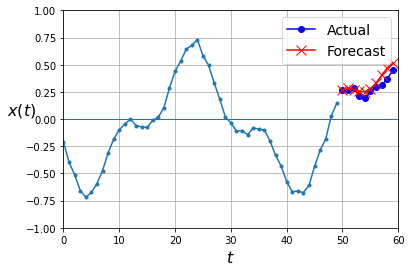

In [45]:
series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]

plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

* 이전 모델보다 성능이 향상됨.
* 이 방식을 처음 모델과 결합할 수 있음
  * 이 RNN으로 다음 값 10개를 예측하고, 이를 시계열에 연결. 그 다음 모델을 다시 사용해 다음 값 10개를 예측하는 식으로 반복하여 어떤 길이의 sequence도 생성할 수 있음